# Project-PH354

### Potential for rectangular graphene chip

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

Text(0.5, 1.0, 'Variation of Potential at the coners of the graphene flake')

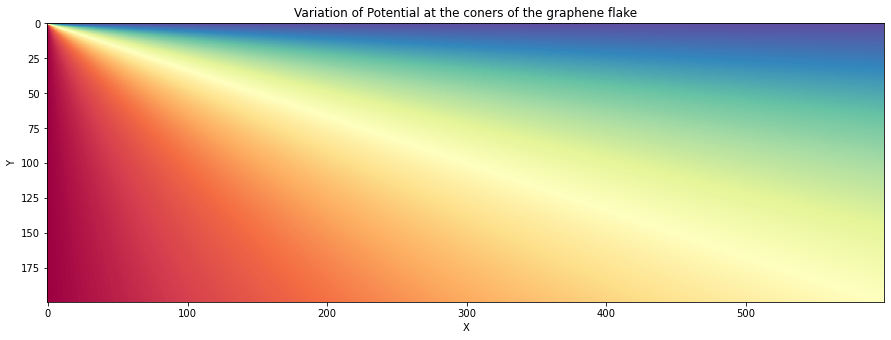

In [2]:
def V_corner(x,y,V_ext):
    return (2/(math.pi))*V_ext*math.atan(y/x)

V_ext=5 #(dummy value)
X=200
Y=600

grid=np.zeros((X,Y))
for i in range(X):
    for j in range(Y):
        if((i)!=0):
            grid[i][j]=V_corner(i/X, j/Y, V_ext)
        else: 
            grid[i][j]=V_ext
plt.figure(figsize=(15,15))    
plt.imshow(grid , cmap='Spectral')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Variation of Potential at the coners of the graphene flake")

### Defining the Spinor function

In [3]:
def Hermite(x,n):
    if(n==0 or n==-1):
        return 1
    if(n==1):
        return 2*x
    else:
        arr=[1,2*x]
        for i in range(2,n+1):
            arr.append(2*x*arr[i-1]-2*(i-1)*arr[i-2])
    return arr[n]

def u(n,x):
    expo=np.exp(-x**2/2)
    herm=Hermite(x,n)
    den=(2**(n/2))*math.sqrt(math.factorial(n))*pi**(1/4)
    return expo*herm/den

### Defining the fundamental constants

In [4]:
c=1e6
h=6.626e-34
e=1.6e-19
pi=math.pi
mu_b=9.3e-24
g=2
k_b=1.38e-23

### Fixing the Electric and Magnetic Field

In [5]:
E=200e3
B=15

### Defining the Energy

In [6]:
def E_np(E, B, n, px):
    m_t=E*px/B
    n_t=c*np.sign(n)*math.sqrt(np.abs(n)*h*B*e/math.pi)
    mult=(1-(E/(c*B))**2)**(3/4)
    return n_t*mult +m_t

def p_delta(Energy, E, B, n):
    sum1=(B/E)*Energy 
    sum2=np.sign(n)*((c*B)/E)*math.sqrt(2*np.abs(n)*e*(h/(2*math.pi))*B)
    mult=(1-(E/(c*B))**2)**(3/4)
    return sum1-sum2*mult

### Defining the zeta coordinate which will be inserted into the Spinor oscillator function

In [7]:
def zeta(E, B, n, px, y):
    beta=math.sqrt((c*B)**2-E**2)
    mult1=math.sqrt((e*beta)/(h*c))
    E_npc= E_np(E, B, n, px)
    mult2=(y+(c**2*px*B-E*E_npc)/(e*beta**2))
    return mult1*mult2

In [8]:
beta=math.sqrt((c*B)**2-E**2)
a=- math.sqrt((c*B+beta)/(2*c*B))
b=(E/math.sqrt(2*c*B))*(1/math.sqrt(c*B+beta))
print(a)
print(b)
const=(e*beta*2*math.pi/(h*c))**(1/4)
print(const)

-0.9999777765430946
0.006666814826338656
12282.174625003545


### Defining the wave functions

In [9]:
#plane-wave solution in x direction
def wave_f(E, B, n, px, x, y):
    beta=math.sqrt((c*B)**2-E**2)
    a=- math.sqrt((c*B+beta)/(2*c*B))
    b=(E/math.sqrt(2*c*B))*(1/math.sqrt(c*B+beta))
    phi= (1/math.sqrt(2*math.pi))*(cmath.exp((1j*x*2*math.pi))/h)
    const=(e*beta*2*math.pi/(h*c))**(1/4)
    zeta_c= zeta(E, B, n, px, y)
    if(n!=0):
        sign1= np.sign(n)*a*u(np.abs(n),zeta_c)-b*u(np.abs(n)-1, zeta_c)
        sign2= a*u(np.abs(n)-1,zeta_c)-b*np.sign(n)*u(np.abs(n), zeta_c)
    if(n==0):
        sign1= np.sign(n)*a*u(np.abs(n),zeta_c)*math.sqrt(2)
        sign2= -b*np.sign(n)*u(np.abs(n), zeta_c)*math.sqrt(2)
    psi1=const*sign1
    psi2=const*sign2

    return 2*(psi1**2+psi2**2)

### Calculating the density of states

In [10]:
def p_delta(Energy, E, B, n):
    sum1=(B/E)*Energy 
    sum2=np.sign(n)*((c*B)/E)*math.sqrt(2*np.abs(n)*e*(h/(2*math.pi))*B)
    mult=(1-(E/(c*B))**2)**(3/4)
    return sum1-sum2*mult



def dof(down, up, E, B, x, y, Energy):
    sum=0
    for i in range(down, up):
        p_d=p_delta(Energy, E, B, i)
        if(i==0):
            pass
        else:
            sum+=wave_f(E, B, i, p_d, x, y)
    return (B/E)*sum

#spin-down 
def dof_spind(down, up, E, B, x, y, Energy):
    Energy1=Energy-g*mu_b/2
    sum1=dof(down, up, E, B, x, y, Energy1)
    return sum1

#spin up
def dof_spinu(down, up, E, B, x, y, Energy):
    Energy2=Energy+g*mu_b/2
    sum2=dof(down, up, E, B, x, y, Energy2)
    return sum2

#total
def dof_spin(down, up, E, B, x, y, Energy):
    Energy1=Energy-g*mu_b/2
    sum1=dof(down, up, E, B, x, y, Energy1)
    Energy2=Energy+g*mu_b/2
    sum2=dof(down, up, E, B, x, y, Energy2)
    return sum1+sum2

In [11]:
E_scale=c*math.sqrt(2*e*(h/(2*math.pi))*B)*((1-(E/(c*B))**2)**(3/4))
print(E_scale)

2.249564703761136e-20


In [12]:
y=1e-10
x=y

In [ ]:
B=15
y=1e-10
x=y

n=np.linspace(-0.1,2.2, 2300)
df=[]
dfu=[]
dfd=[]


for ele in n:
    Energy=ele*E_scale
    df.append(dof_spin(-50,50,E,B,x,y,Energy))
    dfu.append(dof_spinu(-50,50,E,B,x,y,Energy))
    dfd.append(dof_spind(-50,50,E,B,x,y,Energy))

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(n,df)
plt.plot(n,dfu,linewidth=0.7)
plt.fill_between(n, dfu, color='blue', alpha=0.1)
plt.plot(n,dfd,linewidth=0.7)
plt.fill_between(n, dfd, color='red', alpha=0.1)
plt.xlabel('Energy in units of 141 meV')
plt.ylabel('LDOS')
plt.title('LDOS with energy')

In [ ]:
y=1e-10

n=np.linspace(0.9, 1.1, 400)
df=[]
dfu=[]
dfd=[]


for ele in n:
    Energy=ele*E_scale
    df.append(dof_spin(-30,30,E,B,x,y,Energy))
    dfu.append(dof_spinu(-30,30,E,B,x,y,Energy))
    dfd.append(dof_spind(-30,30,E,B,x,y,Energy))

In [ ]:
plt.figure(figsize=(8,8))
#plt.plot(n,df)
plt.plot(n,dfu,linewidth=0.7)
plt.fill_between(n, dfu, color='blue', alpha=0.1)
plt.plot(n,dfd,linewidth=0.7)
plt.fill_between(n, dfd, color='red', alpha=0.1)
plt.title('Left-Right resolution')

## Getting the current

In [13]:
def fermi(E, E_f, T):
    return 1/(np.exp((E-E_f)/(k_b*T))+1)

In [14]:
from scipy.integrate import nquad, dblquad

In [15]:
B=10
E=200e3
T=5
E_scale=c*math.sqrt(2*e*(h/(2*math.pi))*B)*((1-(E/(c*B))**2)**(3/4))

In [16]:
E_scale=c*math.sqrt(2*e*(h/(2*math.pi))*B)*((1-(E/(c*B))**2)**(3/4))
print(E_scale)

1.8364556992755368e-20


In [ ]:
T=5
B=10
r_x=1e-9
r_c=1e-72
r_tol=10e-9
E_f=np.linspace(E_scale, 2*E_scale, 10)
V_SD=0.12
Int=[]

for ele in E_f:
    
    def func(Energy, y):
        return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
    I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
    Int.append(I)


In [28]:
Res=[]
for ele in Int:
    Res.append(ele[0])

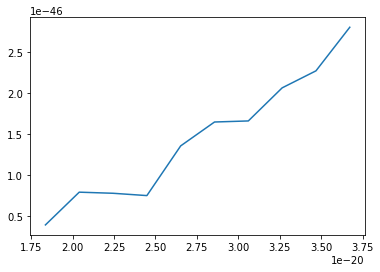

In [29]:
plt.plot(E_f, Res)

In [30]:
T=5
B=10
r_x=1e-9
r_c=1e-72
r_tol=10e-9
E_f=np.linspace(E_scale, 2*E_scale, 10)
V_SD=0.08
Int=[]

for ele in E_f:
    
    def func(Energy, y):
        return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
    I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
    Int.append(I)

In [31]:
Res=[]
for ele in Int:
    Res.append(ele[0])

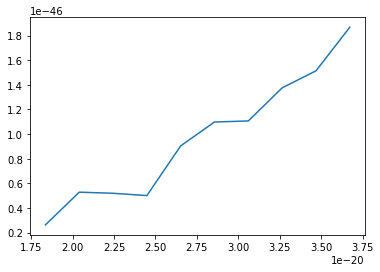

In [32]:
plt.plot(E_f, Res)

In [33]:
T=5
B=10
r_x=1e-9
r_c=1e-72
r_tol=10e-9
E_f=np.linspace(E_scale, 2*E_scale, 10)
V_SD=0.04
Int=[]

for ele in E_f:
    
    def func(Energy, y):
        return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
    I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
    Int.append(I)

In [34]:
Res=[]
for ele in Int:
    Res.append(ele[0])

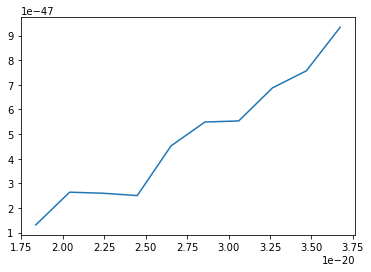

In [35]:
plt.plot(E_f, Res)

In [28]:
T=5
B=10
r_x=1e-9
r_c=1e-72
r_tol=10e-9
V1=[]
E_F=np.linspace(0.5e-20, 4e-20, 40)
V_SD=0.14
for ele in E_F:
    Int=[]
    def func(Energy, y):
        return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
    I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
    print(I[0])
    counter=0
    if(I[0]>1e-47 and counter==0):
        counter=1
        while(I[0]>1e-47):
            V_SD-=0.005
            def func(Energy, y):
                return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
            I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
            print(I[0])
            print(V_SD)
        V1.append(V_SD)
    
    if(I[0]<1e-47 and counter==0):
        counter=-1
        while(I[0]>1e-47):
            V_SD+=0.005
            def func(Energy, y):
                return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
            I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
            print(I[0])
            print(V_SD)
        V1.append(V_SD)

3.1435458488000846e-212
2.1107666428616563e-188
1.4414262926429524e-166
1.0042890973099448e-146
7.171640845839002e-129
5.288498880544652e-113
4.082168251559629e-99
3.3893198981170943e-87
3.2224997373970006e-77
4.179741580096487e-69
1.3594948785605573e-62
4.4546471378170864e-57
1.3511137328004377e-52
1.5974121449124223e-49
1.11372838025472e-47
1.0739523666741943e-47
0.135
1.0341763530936682e-47
0.13
9.944003395131424e-48
0.125
4.409537205941644e-47
4.233155717703976e-47
0.12
4.056774229466311e-47
0.11499999999999999
3.880392741228645e-47
0.10999999999999999
3.704011252990979e-47
0.10499999999999998
3.527629764753314e-47
0.09999999999999998
3.3512482765156475e-47
0.09499999999999997
3.174866788277981e-47
0.08999999999999997
2.998485300040315e-47
0.08499999999999996
2.82210381180265e-47
0.07999999999999996
2.6457223235649837e-47
0.07499999999999996
2.4693408353273183e-47
0.06999999999999995
2.292959347089652e-47
0.06499999999999995
2.116577858851987e-47
0.05999999999999995
1.9401963706143

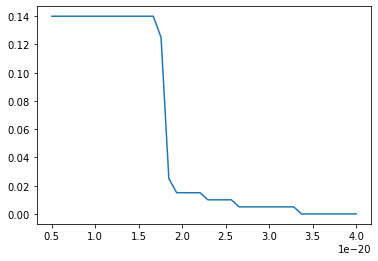

In [29]:
plt.plot(E_F, V)

In [ ]:
E_F1=np.linspace(0.5e-20, 4e-20, 40)
V1=[]
T=5
B=10
r_x=1e-9
r_c=1e-72
r_tol=10e-9
V_SD=0.14
for ele in E_F1:
    def func(Energy, y):
        return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
    I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
    print(I[0])
    counter=0
    if(I[0]>1e-46 and counter==0):
        counter=1
        while(I[0]>1e-46):
            V_SD-=0.005
            def func(Energy, y):
                return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
            I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
            print(I[0])
            print(V_SD)
        V1.append(V_SD)
    
    if(I[0]<1e-46 and counter==0):
        counter=-1
        while(I[0]<1e-46):
            V_SD+=0.005
            def func(Energy, y):
                return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
            I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
            print(I[0])
            print(V_SD)
        V1.append(V_SD)

3.592623827200097e-212
3.7048933218000987e-212
0.165
3.8171628164001015e-212
0.17
3.929432311000105e-212
0.17500000000000002
4.04170180560011e-212
0.18000000000000002
4.1539713002001116e-212
0.18500000000000003
4.2662407948001155e-212
0.19000000000000003


In [ ]:
plt.plot(E_F1 , V1)

In [ ]:
plt.plot(E_F, V, label='10 microA')
plt.xlabel('Fermi Energy')
plt.ylabel('Corner-Potential')
plt.title('graph 2')
plt.legend()

In [17]:
T=5
B=10
r_x=1e-9
r_c=1e-72
r_tol=10e-9
V1=[]
E_F=np.linspace(0.5e-20, 4e-20, 40)
V_SD=0.14
for ele in E_F:
    Int=[]
    def func(Energy, y):
        return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
    I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
    print(I[0])
    counter=0
    if(I[0]>1e-47 and counter==0):
        counter=1
        while(I[0]>1e-47):
            V_SD-=0.005
            def func(Energy, y):
                return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
            I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
            print(I[0])
            print(V_SD)
        V1.append(V_SD)
    
    if(I[0]<1e-47 and counter==0):
        counter=-1
        while(I[0]>1e-47):
            V_SD+=0.005
            def func(Energy, y):
                return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
            I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
            print(I[0])
            print(V_SD)
        V1.append(V_SD)

3.1435458488000846e-212
2.1107666428616563e-188
1.4414262926429524e-166
1.0042890973099448e-146
7.171640845839002e-129
5.288498880544652e-113
4.082168251559629e-99
3.3893198981170943e-87
3.2224997373970006e-77
4.179741580096487e-69
1.3594948785605573e-62
4.4546471378170864e-57
1.3511137328004377e-52
1.5974121449124223e-49
1.11372838025472e-47
1.0739523666741943e-47
0.135
1.0341763530936682e-47
0.13
9.944003395131424e-48
0.125
4.409537205941644e-47
4.233155717703976e-47
0.12
4.056774229466311e-47
0.11499999999999999
3.880392741228645e-47
0.10999999999999999
3.704011252990979e-47
0.10499999999999998
3.527629764753314e-47
0.09999999999999998
3.3512482765156475e-47
0.09499999999999997
3.174866788277981e-47
0.08999999999999997
2.998485300040315e-47
0.08499999999999996
2.82210381180265e-47
0.07999999999999996
2.6457223235649837e-47
0.07499999999999996
2.4693408353273183e-47
0.06999999999999995
2.292959347089652e-47
0.06499999999999995
2.116577858851987e-47
0.05999999999999995
1.9401963706143

In [18]:
T=5
B=10
r_x=1e-9
r_c=1e-72
r_tol=10e-9
V=[]
E_F=np.linspace(2e-20, 4e-20, 40)
V_SD=0.14
for ele in E_F:
    Int=[]
    def func(Energy, y):
        return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
    I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
    print(I[0])
    counter=0
    if(I[0]>1e-46 and counter==0):
        counter=1
        while(I[0]>1e-46):
            V_SD-=0.005
            def func(Energy, y):
                return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
            I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
            print(I[0])
            print(V_SD)
        V.append(V_SD)
    
    if(I[0]<1e-46 and counter==0):
        counter=-1
        while(I[0]>1e-46):
            V_SD+=0.005
            def func(Energy, y):
                return e*fermi(Energy, ele, T)*dof(-30,30,E,B,x,y,Energy)*((2*V_SD)/(pi*B))*math.log((r_x/y)+math.sqrt(1+(r_x/y)**2))
            I=dblquad(func, r_c, r_tol, 0, 1.1*ele)
            print(I[0])
            print(V_SD)
        V.append(V_SD)

9.063779171213541e-47
9.448639207446165e-47
8.92119934065199e-47
9.390263039918642e-47
8.829788937675795e-47
9.366671809635076e-47
9.044666754165623e-47
8.929456514512904e-47
9.641506724897422e-47
8.756747524191083e-47
1.1730420643450326e-46
1.1311477049041388e-46
0.135
1.0892533454632443e-46
0.13
1.0473589860223507e-46
0.125
1.0054646265814566e-46
0.12
9.635702671405626e-47
0.11499999999999999
1.0799655685401345e-46
1.033010543820998e-46
0.10999999999999999
9.860555191018617e-47
0.10499999999999998
1.002099066679165e-46
9.543800635039668e-47
0.09999999999999998
1.1233929179368009e-46
1.0672232720399606e-46
0.09499999999999997
1.0110536261431208e-46
0.08999999999999997
9.548839802462806e-47
0.08499999999999996
1.0757546761605402e-46
1.0124749893275673e-46
0.07999999999999996
9.491953024945941e-47
0.07499999999999996
9.946895572826786e-47
9.542729915097683e-47
1.015668241263113e-46
9.479570251789054e-47
0.06999999999999995
8.723254917931773e-47
9.389352104991668e-47
9.146431126150249e-4

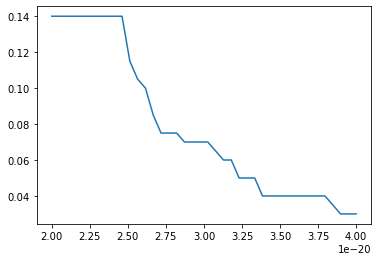

In [19]:
plt.plot(E_F, V)

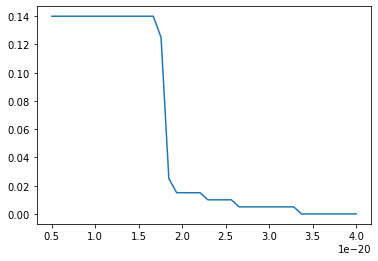

In [20]:
E_F1=np.linspace(0.5e-20, 4e-20, 40)
plt.plot(E_F1,V1)